<a href="https://colab.research.google.com/github/PrateekshaGarlapati3668/deal/blob/main/Customercode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Load your dataset
data = pd.read_csv('churn_data.csv')
data = data.drop(['customer_ID'], axis=1)

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])
    # Separate features and target
X = data.drop('churn', axis=1)
y = data['churn']

# Feature Scaling (optional for RandomForest but good practice for others)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Train model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = rf_classifier.predict(X_test)


In [ ]:
# Accuracy & Reports
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875

Confusion Matrix:
[[6792    1]
 [   7 6075]]


In [ ]:
# Feature Importance Plot
feature_importances = rf_classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

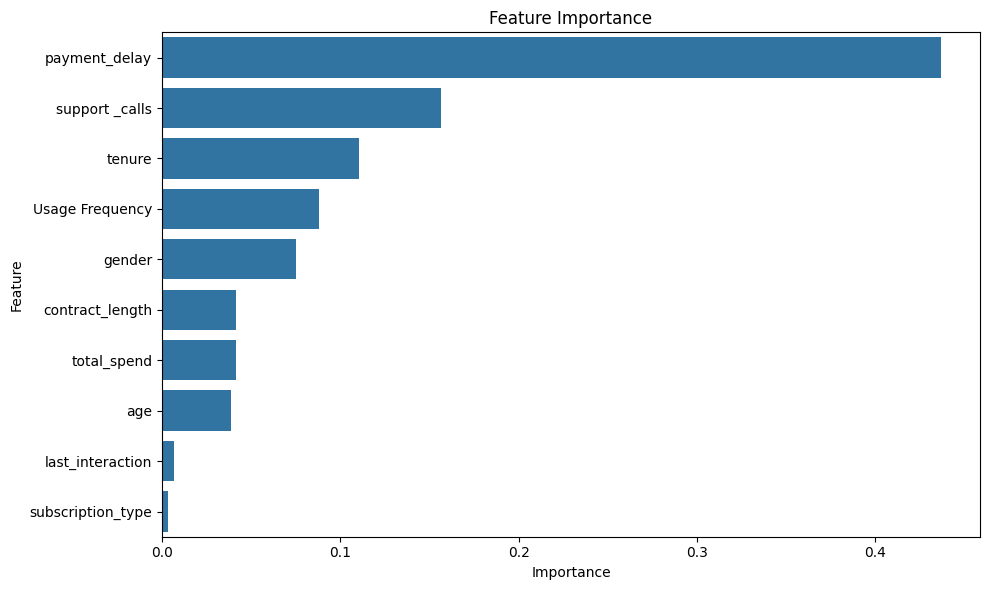

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
# Cross-Validation Accuracy
cv_scores = cross_val_score(rf_classifier, X_scaled, y, cv=5)
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Average CV accuracy: {cv_scores.mean():.2f}")

Cross-validation accuracy scores: [0.99937864 0.99968932 0.99961165 0.99930097 0.99953394]
Average CV accuracy: 1.00
